# REGRESSION

In [1]:
my_tags = c('H3K4me3', 'H3K9ac', 'H3K27ac', 'H3K27me3', 'H3K9me3')

In [2]:
options(repr.plot.width=10, repr.plot.height=7)
library(ggplot2)
c_0 = "#999999"
c_1 = "#dd0000"
c_2 = "#000000"
c_3 = "#22a000"
theme = theme_minimal()

In [3]:
df = read.table(file = '../extracted/pii-vs-npii.all.csv', sep=',', header = 1, row.names = 1)
head(df)

,PII_HUMAN_H3K4me3,NPII_HUMAN_H3K4me3,PII_MOUSE_H3K4me3,NPII_MOUSE_H3K4me3,PII_HUMAN_H3K9ac,NPII_HUMAN_H3K9ac,PII_MOUSE_H3K9ac,NPII_MOUSE_H3K9ac,PII_HUMAN_H3K27ac,NPII_HUMAN_H3K27ac,PII_MOUSE_H3K27ac,NPII_MOUSE_H3K27ac,PII_HUMAN_H3K27me3,NPII_HUMAN_H3K27me3,PII_MOUSE_H3K27me3,NPII_MOUSE_H3K27me3,PII_HUMAN_H3K9me3,NPII_HUMAN_H3K9me3,PII_MOUSE_H3K9me3,NPII_MOUSE_H3K9me3
125-dihydroxyvitamin_Dsub3sub_biosynthesis,2.248360,0.3758903,18.98233,1.600691,2.391201,0.6368459,15.01400,1.060750,2.607717,0.730111,10.48833,1.162761,3.312624,0.7172251,16.36833,13.641415,3.757602,0.8810687,11.62133,8.959243
1D-imyoi-inositol_hexakisphosphate_biosynthesis_II_mammalian,5.605292,0.7990226,36.73393,8.579047,6.174049,0.8619895,32.45407,5.485992,7.398026,1.086097,23.63227,5.620164,3.561952,0.8312005,20.00747,12.638530,3.625598,0.8694887,15.30300,11.036719
1D-imyoi-inositol_hexakisphosphate_biosynthesis_V_from_Ins134P3,1.042087,1.5008494,82.57900,13.647767,1.810458,1.6059073,65.18500,7.035922,2.612022,0.984017,33.13033,4.765789,1.454336,0.5035903,24.61800,21.278668,2.147989,0.5583336,19.07600,15.254292
2-amino-3-carboxymuconate_semialdehyde_degradation_to_glutaryl-CoA,6.896377,1.3132183,38.37850,30.351932,8.087387,1.3756951,26.03500,22.939337,9.118160,2.102414,14.89950,13.832335,7.612660,1.9587415,28.47600,20.090306,8.971827,1.5867402,21.05800,8.468932
2-deoxy-alpha-D-ribose_1-phosphate_degradation,8.357360,1.1028822,24.06560,2.444360,8.118468,1.2069146,23.02380,1.328723,11.054988,1.552252,12.94120,0.826807,6.275483,1.3511966,13.61460,9.236750,5.201340,1.1942692,9.22900,8.535097
2-oxobutanoate_degradation,10.145939,1.1978257,39.19286,5.547288,7.493157,1.1260918,36.34229,4.465171,7.990144,1.087513,25.68729,6.786345,6.347233,1.5685778,18.13100,9.639827,6.749795,1.5966341,16.98414,12.897763


# HUMAN

In [4]:
plot_list = list()
for(hg_tag in my_tags) {
    pii = df[,paste0("PII_HUMAN_", hg_tag)]
    npii = df[,paste0("NPII_HUMAN_", hg_tag)]
    slope = coef(lm(npii ~ pii - 1))

    point_dist = abs(-slope * pii + npii) / slope
    idx_dist_up = npii > slope * pii
    idx_dist_down = npii < slope * pii

    point_dist_up = point_dist[npii > slope * pii]
    point_dist_down = point_dist[npii < slope * pii]

    # hist((-coefs * gre + ngre) / coefs)
    threshold_up = quantile(point_dist_up, 0.95, na.rm = TRUE)
    threshold_down = quantile(point_dist_down, 0.95, na.rm = TRUE)
    # threshold_up
    # threshold_down

    outlier_flag = (idx_dist_up & (point_dist > threshold_up)) | 
                   (idx_dist_down & (point_dist > threshold_down))
    
    outliers_up = idx_dist_up & (point_dist > threshold_up)
    outliers_down = idx_dist_down & (point_dist > threshold_down)
    normal_points = !outliers_up & !outliers_down
    
    res = cor.test(pii, npii)[c(3,4)]
    res_pval = as.character(round(res[[1]],2))
    res_cor = as.character(round(res[[2]],2))
    text_cor = paste('cor: ', res_cor)
    text_pval = paste('p-value: ', res_pval)
    annotations <- data.frame(xpos = Inf, ypos =  Inf,
                              annotateText = paste0(c(text_cor, text_pval), collapse = '\n'),
                              hjustvar = c(1), vjustvar = c(1)) #<- adjust

    p = ggplot(as.data.frame(cbind(pii, npii)), aes(pii, npii)) + 
        geom_point(alpha=0.1, color = 2*outliers_up + 3*outliers_down + normal_points)+ 
        geom_abline(intercept = 0, slope = slope, colour = '#858585') +
        geom_text(data=annotations,aes(x=xpos,y=ypos,hjust=hjustvar,vjust=vjustvar,label=annotateText))+
        ggtitle(paste0("Human ", hg_tag)) + labs(x='PII', y='NPII')
    plot_list[[length(plot_list) + 1]] = p
    
    genes_outliers_up = row.names(df)[idx_dist_up & outlier_flag]
    #length(genes_outliers_up)
    write.table(file = paste0('../extracted/Human_', hg_tag, '_pathways_up.txt'), x = genes_outliers_up, quote = FALSE, col.names = FALSE, row.names = FALSE)
    genes_outliers_down = row.names(df)[idx_dist_down & outlier_flag]
    #length(genes_outliers_down)
    write.table(file = paste0('../extracted/Human_', hg_tag, '_pathways_down.txt'), x = genes_outliers_down, quote = FALSE, col.names = FALSE, row.names = FALSE)
}

# MOUSE

In [5]:
for(hg_tag in my_tags) {
    pii = df[,paste0("PII_MOUSE_", hg_tag)]
    npii = df[,paste0("NPII_MOUSE_", hg_tag)]
    slope = coef(lm(npii ~ pii - 1))

    point_dist = abs(-slope * pii + npii) / slope
    idx_dist_up = npii > slope * pii
    idx_dist_down = npii < slope * pii

    point_dist_up = point_dist[npii > slope * pii]
    point_dist_down = point_dist[npii < slope * pii]

    # hist((-coefs * gre + ngre) / coefs)
    threshold_up = quantile(point_dist_up, 0.95, na.rm = TRUE)
    threshold_down = quantile(point_dist_down, 0.95, na.rm = TRUE)
    # threshold_up
    # threshold_down

    outlier_flag = (idx_dist_up & (point_dist > threshold_up)) | 
                   (idx_dist_down & (point_dist > threshold_down))
    
    outliers_up = idx_dist_up & (point_dist > threshold_up)
    outliers_down = idx_dist_down & (point_dist > threshold_down)
    normal_points = !outliers_up & !outliers_down
    
    res = cor.test(pii, npii)[c(3,4)]
    res_pval = as.character(round(res[[1]],2))
    res_cor = as.character(round(res[[2]],2))
    text_cor = paste('cor: ', res_cor)
    text_pval = paste('p-value: ', res_pval)
    annotations <- data.frame(xpos = Inf, ypos =  Inf,
                              annotateText = paste0(c(text_cor, text_pval), collapse = '\n'),
                              hjustvar = c(1), vjustvar = c(1)) #<- adjust

    p = ggplot(as.data.frame(cbind(pii, npii)), aes(pii, npii)) + 
        geom_point(alpha=0.1, color = 2*outliers_up + 3*outliers_down + normal_points)+ 
        geom_abline(intercept = 0, slope = slope, colour = '#858585') +
        geom_text(data=annotations,aes(x=xpos,y=ypos,hjust=hjustvar,vjust=vjustvar,label=annotateText))+
        ggtitle(paste0("Mouse ", hg_tag)) + labs(x='PII', y='NPII')
    plot_list[[length(plot_list) + 1]] = p
    
    genes_outliers_up = row.names(df)[idx_dist_up & outlier_flag]
    #length(genes_outliers_up)
    write.table(file = paste0('../extracted/Mouse_', hg_tag, '_pathways_up.txt'), x = genes_outliers_up, quote = FALSE, col.names = FALSE, row.names = FALSE)
    genes_outliers_down = row.names(df)[idx_dist_down & outlier_flag]
    #length(genes_outliers_down)
    write.table(file = paste0('../extracted/Mouse_', hg_tag, '_pathways_down.txt'), x = genes_outliers_down, quote = FALSE, col.names = FALSE, row.names = FALSE)
}

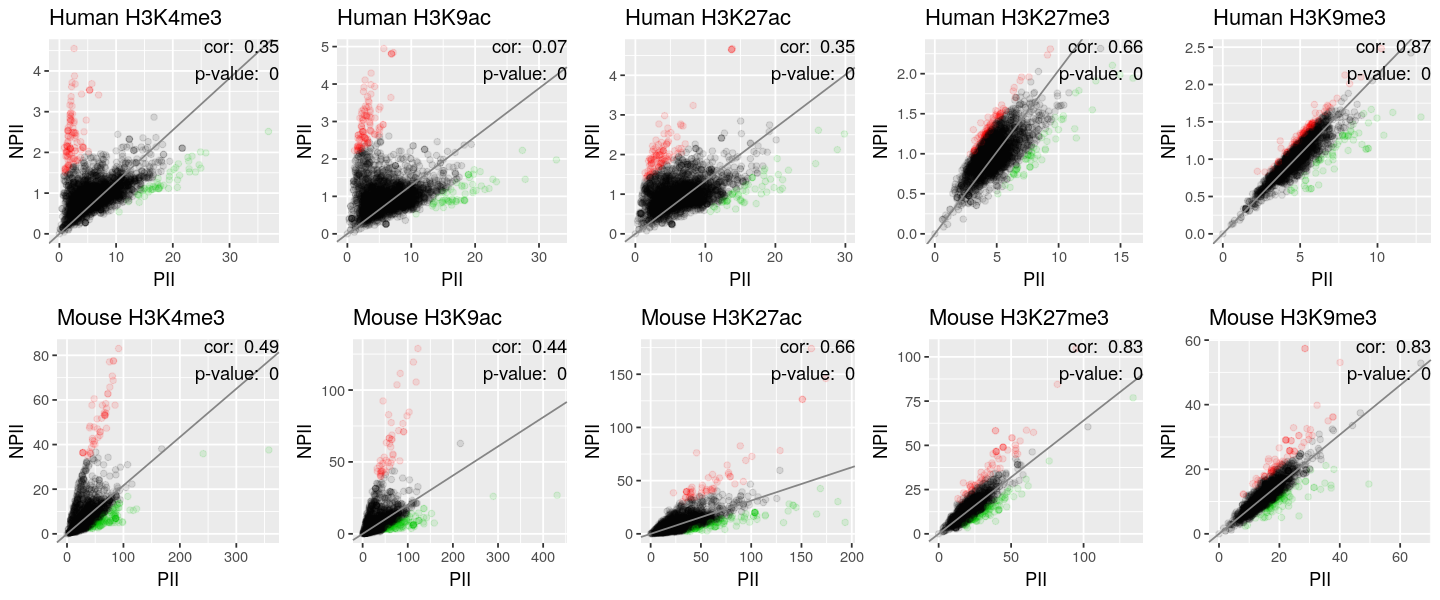

In [6]:
library(gridExtra)
library(grid)
options(repr.plot.width=12, repr.plot.height=5)

n <- length(plot_list)
nCol <- length(my_tags)
do.call("grid.arrange", c(plot_list, ncol=nCol))